In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer


##Load Train Data

In [2]:
train_df = pd.read_csv("data/train.csv", index_col="PassengerId")
train_shape = train_df.shape
display(train_df.head())
print(f"Entries: {train_shape[0]}\nFeatures: {train_shape[1]}")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Entries: 891
Features: 11


##DATA PREPROCESSING

In [3]:
# initial dtypes of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


We observe that cabin is mostly made up of nulls. We also see from the preview of the data that while it is classed as object, it is actually string type, which cannot be categorized and does not contribute much to the outcome. Thus, this column should not be used for analyses.

We also notice that Age has a significant number of nulls.

#Describe

In [4]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.describe(include=np.object)

C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_384\3112399288.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_df.describe(include=np.object)


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<Axes: >

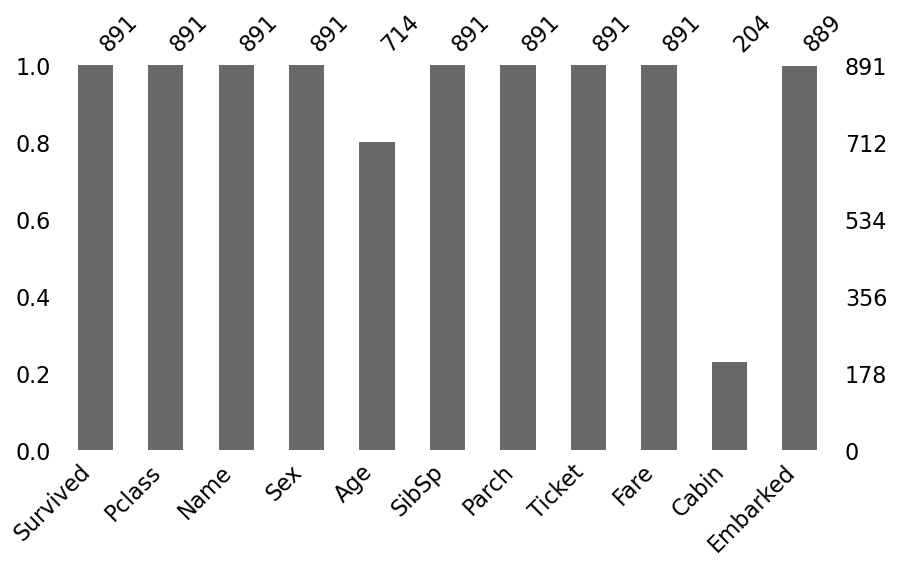

In [6]:
#  null entries
msno.bar(train_df, figsize=(10,5))

Text(0.5, 1.0, 'Heatmap of Missing Values')

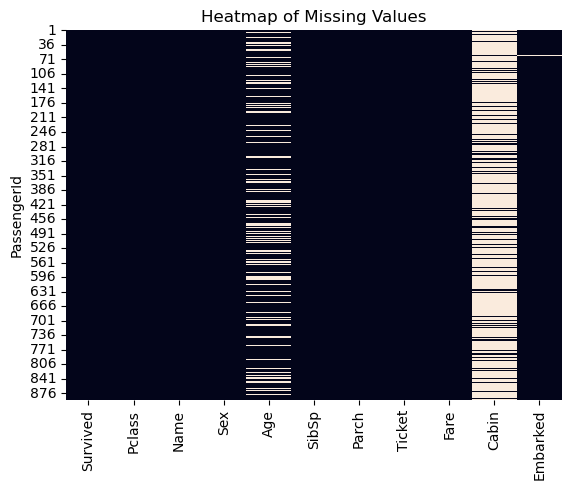

In [7]:
train_df.isnull().sum()

sns.heatmap(train_df.isnull(), cbar = False).set_title("Heatmap of Missing Values")

In [8]:
# no. of unique values in each column
train_df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [9]:
train_df.query("Ticket == 'CA. 2343'")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [10]:
train_df.sort_values("SibSp")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S


In [11]:
#  check if there are duplicated passengers
count_duplicated_passengers = train_df.Name.duplicated().sum()
print(f"There are {count_duplicated_passengers} duplicated passengers in this log.")

There are 0 duplicated passengers in this log.


What needs to be done:
1. reformat column names -> lowercase 
2. deal with entries/features with null values: impute or drop

In [12]:
#  reformat column names
train_df.columns = train_df.columns.str.lower()
train_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Embarked was imputed using the mode as there were only 3 missing values and it is most likely that it would follow the values of the most frequent S.

In [13]:
train_df['embarked'].fillna(train_df['embarked'].mode()[0], inplace=True)

Now looking at Age

In [14]:
#  check entries with null Age values
null_age = train_df.age.isna()
display(train_df[null_age].head())
print(f"There are {null_age.sum()} passengers with no age specified.")
print(f"That is {(null_age.sum() / train_df.shape[0]) * 100:.2f}% of the entire train_df with no specified age")

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


There are 177 passengers with no age specified.
That is 19.87% of the entire train_df with no specified age


array([[<Axes: title={'center': 'age'}>]], dtype=object)

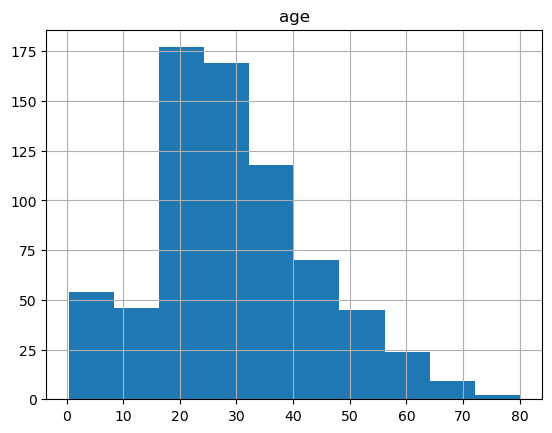

In [15]:
# looking at distribution of age 
train_df.hist(column = 'age')

In [16]:
#checking pclass values
train_df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [17]:
#checking possible titles

train_df['title'] = train_df['name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

train_df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [18]:
# making Miss into Ms
train_df['title'] = train_df['title'].replace('Miss','Ms')

train_df['title'].unique()

array(['Mr', 'Mrs', 'Ms', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Major',
       'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer'],
      dtype=object)

In [19]:
group = train_df.groupby(['pclass','sex','title'])
group.count()

survived  name  age  sibsp  parch  ticket  fare  \
pclass sex    title                                                           
1      female Dr                   1     1    1      1      1       1     1   
              Lady                 1     1    1      1      1       1     1   
              Mlle                 2     2    2      2      2       2     2   
              Mme                  1     1    1      1      1       1     1   
              Mrs                 42    42   34     42     42      42    42   
              Ms                  46    46   45     46     46      46    46   
              the Countess         1     1    1      1      1       1     1   
       male   Capt                 1     1    1      1      1       1     1   
              Col                  2     2    2      2      2       2     2   
              Don                  1     1    1      1      1       1     1   
              Dr                   4     4    3      4      4       4     4   
              Jonkheer             1     1    1      1      1       1     1   
              Major                2     2    2      2      2       2     2   
              Master               3     3    3      3      3       3     3   
              Mr                 107   107   87    107    107     107   107   
              Sir                  1     1    1      1      1       1     1   
2      female Mrs                 41    41   41     41     41      41    41   
              Ms                  35    35   33     35     35      35    35   
       male   Dr                   2     2    2      2      2       2     2   
              Master               9     9    9      9      9       9     9   
              Mr                  91    91   82     91     91      91    91   
              Rev                  6     6    6      6      6       6     6   
3      female Mrs                 42    42   33     42     42      42    42   
              Ms                 102   102   69    102    102     102   102   
       male   Master              28    28   24     28     28      28    28   
              Mr                 319   319  229    319    319     319   319   

                            cabin  embarked  
pclass sex    title                          
1      female Dr                1         1  
              Lady              1         1  
              Mlle              2         2  
              Mme               1         1  
              Mrs              36        42  
              Ms               39        46  
              the Countess      1         1  
       male   Capt              1         1  
              Col               1         2  
              Don               0         1  
              Dr                2         4  
              Jonkheer          0         1  
              Major             2         2  
              Master            3         3  
              Mr               85       107  
              Sir               1         1  
2      female Mrs               5        41  
              Ms                5        35  
       male   Dr                0         2  
              Master            3         9  
              Mr                3        91  
              Rev               0         6  
3      female Mrs               3        42  
              Ms                3       102  
       male   Master            1        28  
              Mr                5       319

In [24]:
# SEND HELP HERE PLS

train_df = train_df.groupby(['pclass','sex','title']).transform(lambda x: x.fillna(x.median()))

train_df.describe()


C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_384\670551290.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  train_df = train_df.groupby(['pclass','sex','title']).transform(lambda x: x.fillna(x.median()))
C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_384\670551290.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  train_df = train_df.groupby(['pclass','sex','title']).transform(lambda x: x.fillna(x.median()))
C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_384\670551290.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transfor

,survived,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.143850,0.523008,0.381594,32.204208
std,0.486592,13.496074,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,36.750000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
#  impute with reference to title (Mr., Ms., Mrs.), passenger class, and sex
def age_solution(df):
    train_df = df.groupby(['pclass','sex','title']).transform(lambda x: x.fillna(x.median()))
    return train_df

train_df = age_solution(train_df)

KeyError: 'pclass'

Imputation for age was done by using the median (due to the skewed nature of the plot) and with reference to title and passenger class.

The title and passenger class were used as reference as these can be used as a general guide for the age of a person. For instance, especially considering the time period, it is more liklely for someone with a title "Mrs" to be older than someone with a title "Ms". Passenger class was also used as those who are older are more likely to make more money. However, young companions or family members may also be the same passenger class. As such, the titles provide more information on the passenger and their age. Sex was also used for further classification.

Looking at Cabin Column

In [26]:
#  check entries with null Cabin values
null_cabin = train_df.cabin.isna()
display(train_df[null_cabin].head())
print(f"There are {null_cabin.sum()} passengers with no cabin specified.")
print(f"That is {(null_cabin.sum() / train_df.shape[0]) * 100:.2f}% of the entire train_df with no specified cabin ID")

AttributeError: 'DataFrame' object has no attribute 'cabin'

In [14]:
#  drop cabin column
def cabin_solution(df):
    return df.drop(columns=["cabin"])

train_df = cabin_solution(train_df)
train_df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


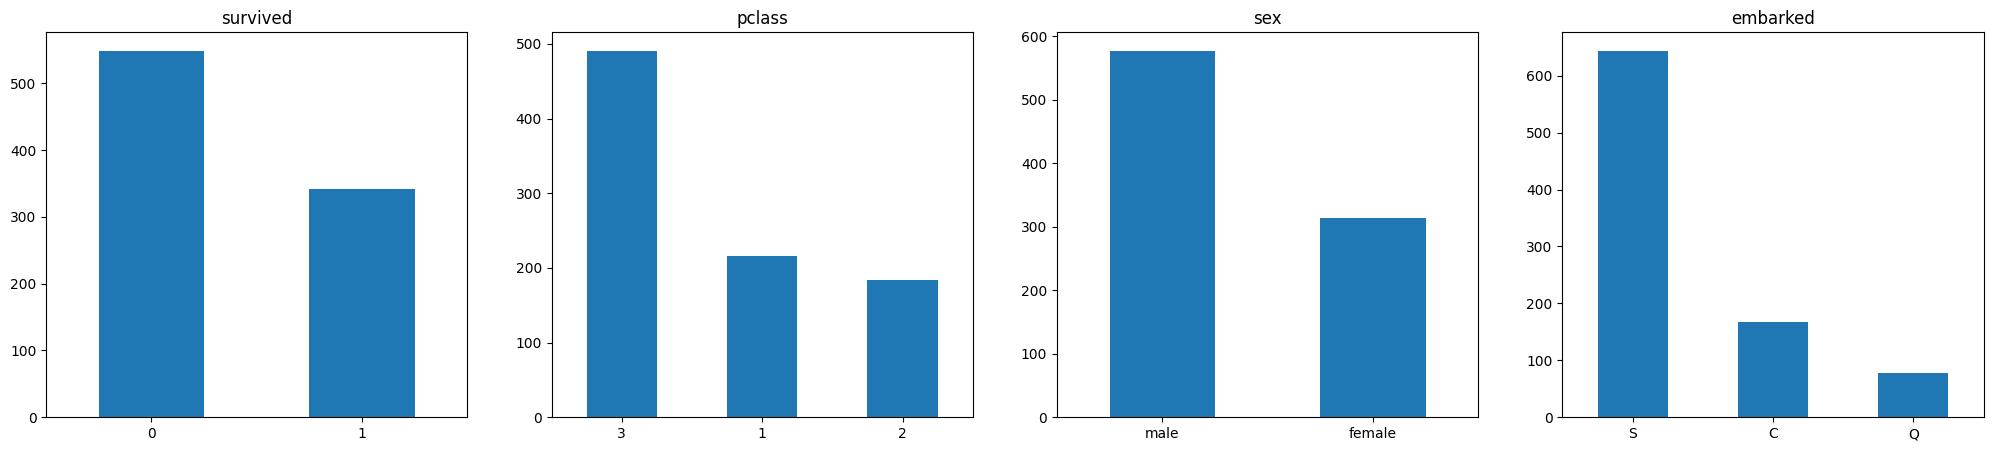

In [15]:
fig, axs = plt.subplots(1,4, figsize=(25,5))

bar_list = ["survived", 
            "pclass",
            "sex",
            "embarked",]

for i, col in enumerate(bar_list):
    train_df[col].value_counts().plot(kind="bar",
                       ax=axs[i],
                       rot=0)
    axs[i].set_title(col)

Survival rate of 1: 62.96%
Survival rate of 2: 47.28%
Survival rate of 3: 24.24%
Survival rate of female: 74.20%
Survival rate of male: 18.89%
Survival rate of C: 55.36%
Survival rate of Q: 38.96%
Survival rate of S: 33.70%


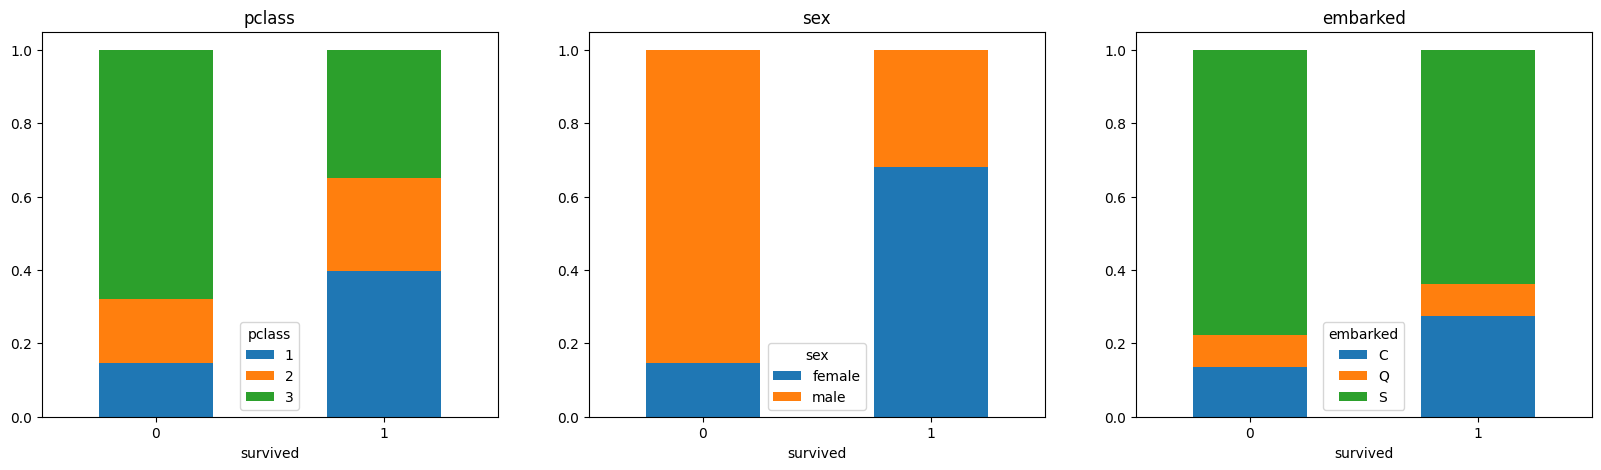

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

col_list = ["pclass",
            "sex",
            "embarked",]

for i, col in enumerate(col_list):
    pd.crosstab(train_df["survived"], train_df[col], normalize="index").plot.bar(stacked=True, ax=axs[i], rot=0)
    axs[i].set_title(col)
    
for col in col_list:
    survival_rates = pd.crosstab(train_df["survived"], train_df[col], normalize="columns").loc[1]
    for category in survival_rates.index:
        print(f"Survival rate of {category}: {survival_rates[category] * 100:.2f}%")
    

Mean Age: 29.70
Median Age: 28.0

Mean Fare: 32.20
Median Fare: 14.45


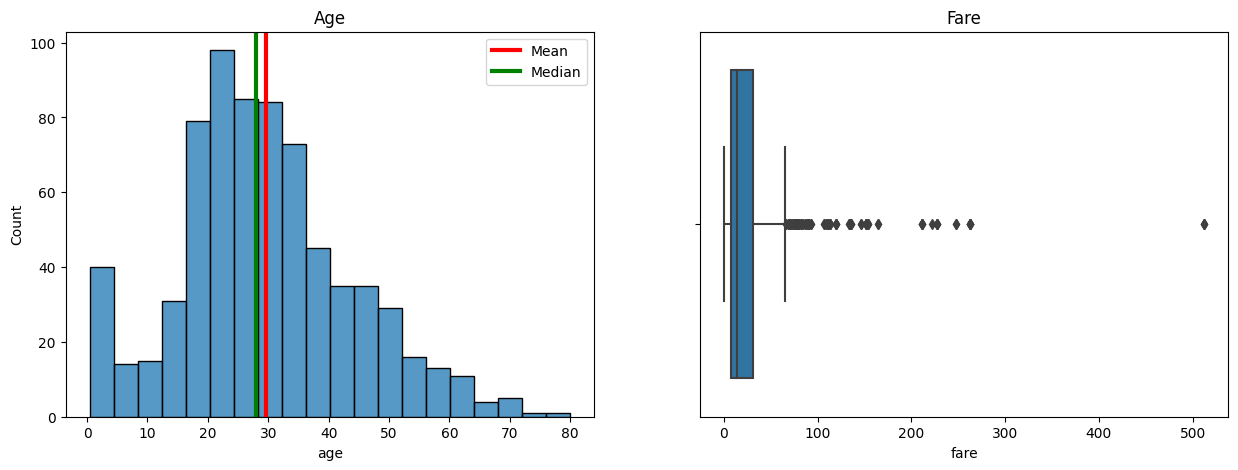

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data=train_df,
             x="age",
             ax=axs[0])
axs[0].set_title("Age")
axs[0].axvline(x=train_df.age.mean(),
               linewidth=3, 
               color='r',
               label="Mean"
               )
axs[0].axvline(x=train_df.age.median(),
               linewidth=3, 
               color='g',
               label="Median"
               )
axs[0].legend()

sns.boxplot(data=train_df,
            x="fare",
            ax=axs[1])
axs[1].set_title("Fare")

print(f"Mean Age: {train_df.age.mean():.2f}")
print(f"Median Age: {train_df.age.median()}\n")
print(f"Mean Fare: {train_df.fare.mean():.2f}")
print(f"Median Fare: {train_df.fare.median():.2f}")

mean               min          max      
sex          female       male female  male female  male
survived                                                
0         25.046875  31.618056   2.00  1.00   57.0  74.0
1         28.847716  27.276022   0.75  0.42   63.0  80.0

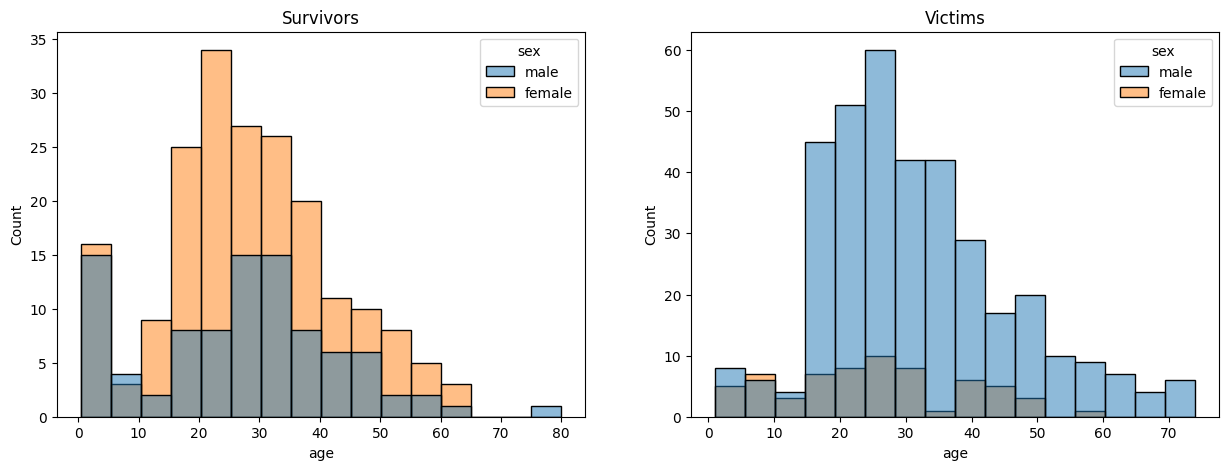

In [18]:
survivors = train_df.query("survived == 1")
victims = train_df.query("survived == 0")

fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data=survivors,
             x="age",
             hue="sex",
             ax=axs[0],
             hue_order=["male", "female"]
             )
axs[0].set_title("Survivors")

sns.histplot(data=victims,
             x="age",
             hue="sex",
             ax=axs[1],
             hue_order=["male", "female"]
             )
axs[1].set_title("Victims")

sex_numerical = pd.crosstab(train_df.survived, train_df.sex, train_df.age, aggfunc=[np.mean, min, max])
display(sex_numerical)

mean                         min                max            
pclass            1          2          3     1      2     3     1     2     3
survived                                                                      
0         43.695312  33.544444  26.555556  2.00  16.00  1.00  71.0  70.0  74.0
1         35.368197  25.901566  20.646118  0.92   0.67  0.42  80.0  62.0  63.0

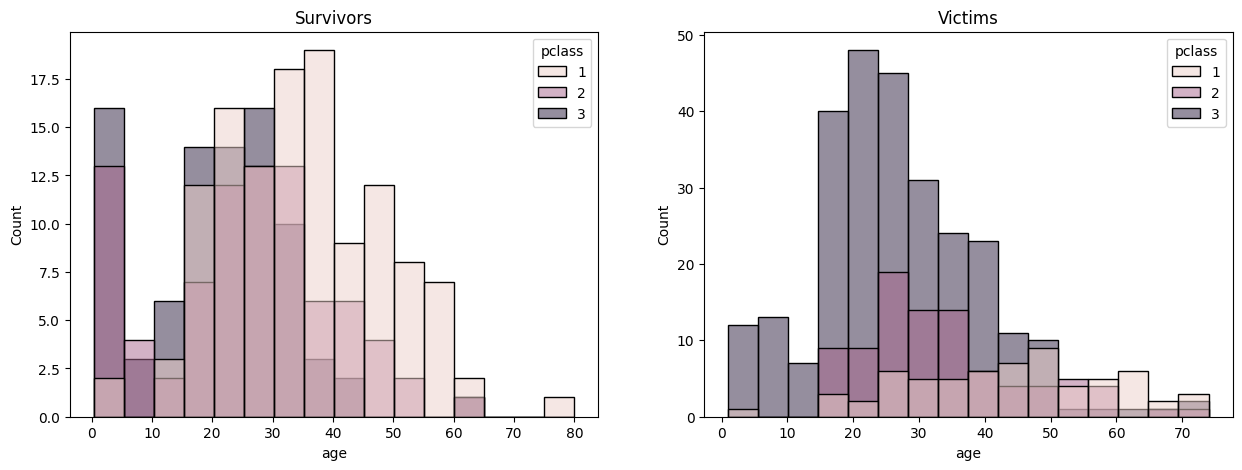

In [19]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data=survivors,
             x="age",
             hue="pclass",
             ax=axs[0],
             hue_order=["male", "female"]
             )
axs[0].set_title("Survivors")

sns.histplot(data=victims,
             x="age",
             hue="pclass",
             ax=axs[1],
             hue_order=["male", "female"]
             )
axs[1].set_title("Victims")

pclass_numerical = pd.crosstab(train_df.survived, train_df.pclass, train_df.age, aggfunc=[np.mean, min, max])
display(pclass_numerical)

In [33]:
train_df['sex'] = train_df['sex'].replace(['female','male'],[0,1])

train_df

KeyError: 'sex'

In [20]:
#  one hot encoding for embarked features
train_df = pd.get_dummies(data=train_df,
                          columns=["embarked"])
train_df

,survived,pclass,name,age,sibsp,parch,ticket,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,0,1
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,1,0,0,0,1


In [21]:
#  companion count column
train_df["companions"] = train_df.sibsp + train_df.parch
train_df = train_df.drop(columns=["sibsp", "parch"])
train_df.sort_values("companions")

,survived,pclass,name,age,ticket,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,companions
PassengerId,,,,,,,,,,,,
891,0,3,"Dooley, Mr. Patrick",32.0,370376,7.7500,0,1,0,1,0,0
681,0,3,"Peters, Miss. Katie",NaN,330935,8.1375,1,0,0,1,0,0
682,1,1,"Hassab, Mr. Hammad",27.0,PC 17572,76.7292,0,1,1,0,0,0
392,1,3,"Jansson, Mr. Carl Olof",21.0,350034,7.7958,0,1,0,0,1,0
683,0,3,"Olsvigen, Mr. Thor Anderson",20.0,6563,9.2250,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202,0,3,"Sage, Mr. Frederick",NaN,CA. 2343,69.5500,0,1,0,0,1,10
160,0,3,"Sage, Master. Thomas Henry",NaN,CA. 2343,69.5500,0,1,0,0,1,10
793,0,3,"Sage, Miss. Stella Anna",NaN,CA. 2343,69.5500,1,0,0,0,1,10


Survival rate for passengers with 0 companions: 30.35%
Survival rate for passengers with 1 companions: 55.28%
Survival rate for passengers with 2 companions: 57.84%
Survival rate for passengers with 3 companions: 72.41%
Survival rate for passengers with 4 companions: 20.00%
Survival rate for passengers with 5 companions: 13.64%
Survival rate for passengers with 6 companions: 33.33%
Survival rate for passengers with 7 companions: 0.00%
Survival rate for passengers with 10 companions: 0.00%


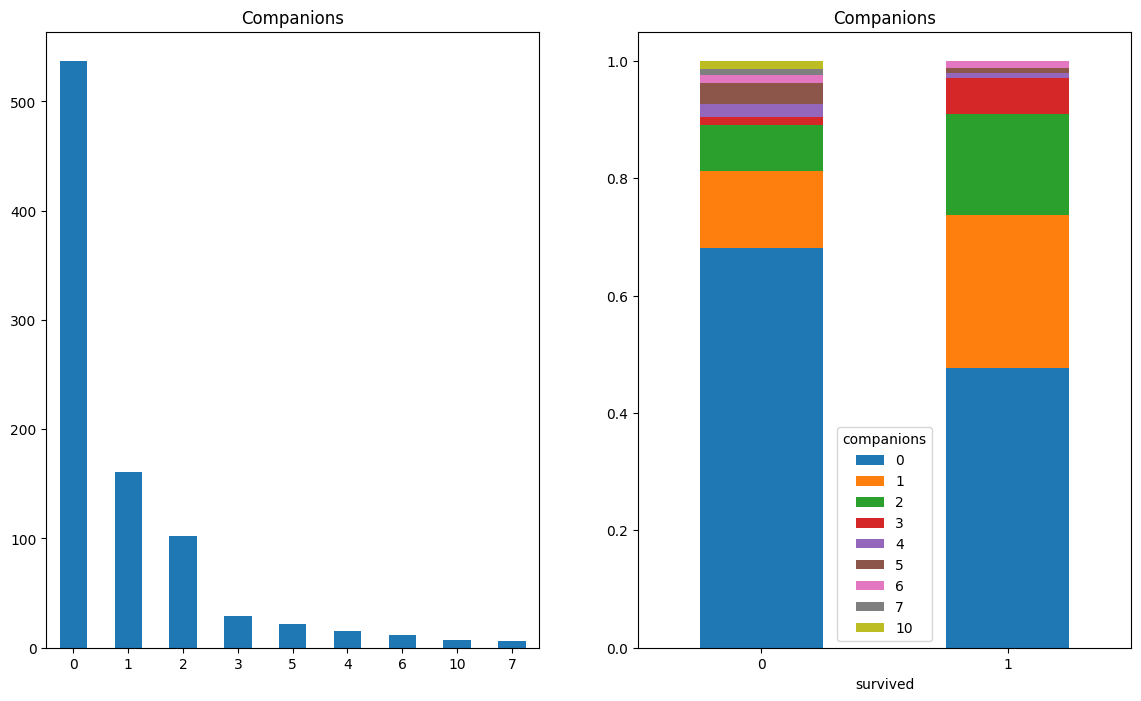

In [39]:
fig, axs = plt.subplots(1,2, figsize=(14,8))

train_df.companions.value_counts().plot.bar(ax=axs[0], rot=0,title="Companions")
pd.crosstab(train_df.survived, train_df.companions, normalize="index").plot.bar(stacked=True, ax=axs[1],rot=0,title="Companions")

survivor_companions = pd.crosstab(train_df.survived, train_df.companions, normalize="columns").loc[1] * 100

for idx in survivor_companions.index:
    print(f"Survival rate for passengers with {idx} companions: {survivor_companions[idx]:.2f}%")

In [34]:
train_df.companions.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: companions, dtype: int64

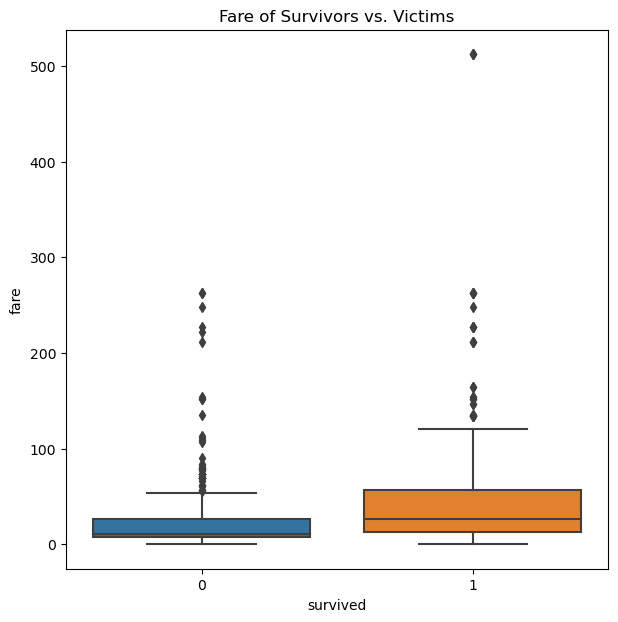

Survivors Mean Fare: 48.40
Survivors Median Fare: 26.00
Victims Mean Fare: 22.12
Victims Median Fare: 10.50


In [48]:
fig, axs = plt.subplots(1,1, figsize=(7,7))

sns.boxplot(data=train_df,
            x="survived", y="fare")
axs.set_title("Fare of Survivors vs. Victims")
plt.show()

print(f"Survivors Mean Fare: {train_df.query('survived==1')['fare'].mean():.2f}")
print(f"Survivors Median Fare: {train_df.query('survived==1')['fare'].median():.2f}")
print(f"Victims Mean Fare: {train_df.query('survived==0')['fare'].mean():.2f}")
print(f"Victims Median Fare: {train_df.query('survived==0')['fare'].median():.2f}")

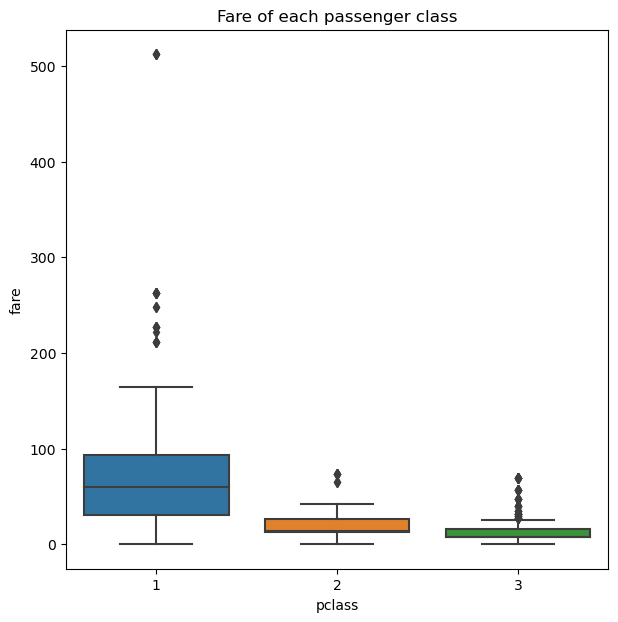

pclass 1 Mean & Median Fare: 84.15 | 60.29
pclass 2 Mean & Median Fare: 20.66 | 14.25
pclass 3 Mean & Median Fare: 13.68 | 8.05


In [49]:
fig, axs = plt.subplots(1,1, figsize=(7,7))

sns.boxplot(data=train_df,
            x="pclass", y="fare")
axs.set_title("Fare of each passenger class")
plt.show()

print(f"pclass 1 Mean & Median Fare: {train_df.query('pclass==1')['fare'].mean():.2f} | {train_df.query('pclass==1')['fare'].median():.2f}")
print(f"pclass 2 Mean & Median Fare: {train_df.query('pclass==2')['fare'].mean():.2f} | {train_df.query('pclass==2')['fare'].median():.2f}")
print(f"pclass 3 Mean & Median Fare: {train_df.query('pclass==3')['fare'].mean():.2f} | {train_df.query('pclass==3')['fare'].median():.2f}")